In [135]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun_forInt import *
from random import uniform
import random
import matplotlib
#%matplotlib auto

In [136]:
originG = [0,0,0] # the global origin
thetG = [0,0,0] # rotation with respect to itself aka 0,0,0
origin1 = [-32.075,-128,0] #x,y (ellipse1)
origin2 = [64.15-32.075,-128,0] #x,y (ellipse2)
origin3 = [-32.075,128,0] #x,y (ellipse3)
origin4 = [64.15-32.075,128,0] #x,y  (ellipse4)
#origin5 = [128.3,-120.501,0] # (ellipse5) changed for 2D
origin5 = [128.3-32.075,-128,0]
#origin6 = [128.3,120.501,0] # (ellipse6) changed for 2D
origin6 = [128.3-32.075,128,0]
origin7 = [160.375-32.075,-7.5,40]
#origin8 = [-64.15,-120.501,0] changed for 2D
#origin9 = [-64.15,120.501,0] changed for 2D
origin8 = [-64.15-32.075,-128,0] 
origin9 = [-64.15-32.075,128,0]
origin10 = [-96.225-32.075,7.5,-40]

originpolar1 = [-128.3,0.0,0.0]
originpolar2 = [-64.15,0.0,0.0]
originpolar3 = [64.15,0.0,0.0]
originpolar4 = [128.3,0.0,0.0]

thet = [0,0,0] #A
thet5 = [0,0,-.1164] 
thet6 = [0,0,.1164] #testing
thet7 = [0,.319422,1.3106]
thet10 = [0,.310422,-1.3106]

coeffellipse56 = [248.39,256.65,64.58]  #for ellipses 5&6
coeffellipse = [263.9,256,64.15] #for center ellipses
coeffmirr = [31.75,25.4,19.05]
coeffpolar = [32.075,32.075,0] #for polarizers (2d circle)

#polarizer1
xp1,yp1,zp1 = polarizer(originpolar1,coeffpolar,0.0)
#polarizer2
xp2,yp2,zp2 = polarizer(originpolar2,coeffpolar,0.0)
#polarizer3
xp3,yp3,zp3 = polarizer(originpolar3,coeffpolar,0.0)
#polarizer4
xp4,yp4,zp4 = polarizer(originpolar4,coeffpolar,0.0)

#CEBS
xC,yC1,yCn,zC = CEBS(coeffellipse,300) #center
xS,yS1,ySn,zS = CEBS(coeffellipse,300) #side

#E1
xC1,yC11,zC1 = SR2(32.07,xC,yC1,zC,originG)
xL1,yL1,zL1 = transformLG(xC1,yC11,zC1,origin1,thetG) 
#E2
xC2,yC12,zC2 = SR2(32.07,xC,yC1,zC,originG)
xL2,yL2,zL2 = transformLG(xC2,yC12,zC2,origin2,thetG) 
#E3
xC3,yCn3,zC3 = SR2(32.07,xC,yCn,zC,originG)
xL3,yL3,zL3 = transformLG(xC3,yCn3,zC3,origin3,thetG)
#E4
xC4,yCn4,zC4 = SR2(32.07,xC,yCn,zC,originG)
xL4,yL4,zL4 = transformLG(xC4,yCn4,zC4,origin4,thetG)
#E5
xS5,yS15,zS5 = transformLG(xS,yS1,zS,origin5,thet5)
xL5,yL5,zL5 = SR2(32.07,xS5,yS15,zS5,origin5)
#E6
xS6,ySn6,zS6 = transformLG(xS,ySn,zS,origin6,thet6)
xL6,yL6,zL6 = SR2(32.07,xS6,ySn6,zS6,origin6)
#E8
xS8,yS18,zS8 = transformLG(xS,yS1,zS,origin8,thet6)
xL8,yL8,zL8 = SR2(32.07,xS8,yS18,zS8,origin8)
#E9
xS9,ySn9,zS9 = transformLG(xS,ySn,zS,origin9,thet5)
xL9,yL9,zL9 = SR2(32.07,xS9,ySn9,zS9,origin9)
#mirror
xM,yM,zM = mirror(originG,coeffmirr,0.0)

#point (global)
sourcepoint = [-160.375,-113,0] #global

#angle (global)
rand = float(random.randrange(32000,96000))
angle = rand/1000
v = [angle,251,0] #random angle
x,y,z = ML(sourcepoint,v,250)

#angle limits
v1 = [32.075,251,0] #edge 1
v2 = [96.225,251,0] #edge 2
x1,y1,z1 = ML(sourcepoint,v1,200)
x2,y2,z2 = ML(sourcepoint,v2,200)

print('Continue')

Continue


In [137]:
#all the reflections
sp10,v10 = RT(sourcepoint,v,thetG,originG,thet6,origin8) #ray from E10 (or GLobal Source rn)
points810,vects810 = REPCNi3(coeffellipse56,sp10,v10) #ray off of 8
sp8,v8 = RT(points810,vects810,thet6,origin8,thet,origin3) #ray from 8 (to 3)
points38,vects38 = REPCNi3(coeffellipse,sp8,v8) #Reflection off of E3 (from 8)

#MIRROR
originmirrcent = [0.,0.,0.]
spM,vM = RT(points38,vects38,thet,origin3,thet,originG) #from Local 3 to Global Mirror
sMhit,sVhit,sMmiss,sVmiss = IntMS(spM,vM,coeffmirr,originmirrcent) #reflection off of mirror
spMr,vMr = RT(sMhit,sVhit,thet,originG,thet,origin4) #from Global Mirror to Local 4 

#after mirror
points4M,vects4M = REPCNi3(coeffellipse,spMr,vMr) #reflection off of E4 (from mirror)
sp4,v4 = RT(points4M,vects4M,thet,origin4,thet5,origin5) #from Local 4 to Local 5
points54,vects54 = REPCNi3(coeffellipse56,sp4,v4) #reflection off of E5 (from E4)
sp5,v5 = RT(points54,vects54,thet5,origin5,thet7,origin7) #from Local 5 to Local 7

#everything in global
p810,v810 = RT(points810,vects810,thet6,origin8,thetG,originG)
p38,v38 = RT(points38,vects38,thet,origin3,thetG,originG)
pm3,vm3 = RT(sMhit,sVhit,thet,originG,thet,originG) #global
p4m,v4m = RT(points4M,vects4M,thet,origin4,thet,originG) #global
p54,v54 = RT(points54,vects54,thet5,origin5,thet,originG) #global
print('Continue')

Continue


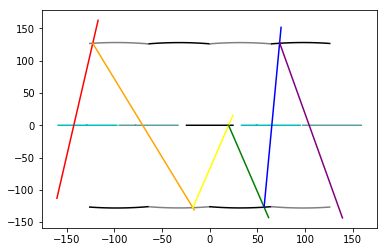

In [112]:
xr,yr,zr = ML(p810,v810,280)
xr3,yr3,zr3 = ML(p38,v38,150)
x,y,z = ML(sourcepoint,v,280)
xm,ym,zm = ML(pm3,vm3,150)
xr4,yr4,zr4 = ML(p4m,v4m,280)
xr5,yr5,zr5 = ML(p54,v54,280)


pl.plot(xL1,yL1, color = 'black')
pl.plot(xL2,yL2, color = 'grey')
pl.plot(xL3,yL3, color = 'grey')
pl.plot(xL4,yL4, color = 'black')
pl.plot(xL5,yL5, color = 'black')
pl.plot(xL6,yL6, color = 'grey')
pl.plot(xL8,yL8, color = 'grey')
pl.plot(xL9,yL9, color = 'black')
pl.plot(xM,yM, color = 'black')
pl.plot(xp1,yp1,color = 'c')
pl.plot(xp2,yp2,color = 'cadetblue')
pl.plot(xp3,yp3,color = 'c')
pl.plot(xp4,yp4,color = 'cadetblue')
#pl.plot(x1,y1, color = 'lightblue')
pl.plot(x,y, color = 'red')
#pl.plot(x2,y2,color = 'lightblue')
pl.plot(xr,yr,color = 'orange')
pl.plot(xr3,yr3,color = 'yellow')
pl.plot(xm,ym, color = 'green')
pl.plot(xr4,yr4,color = 'blue')
pl.plot(xr5,yr5,color = 'purple')
pl.show()

In [138]:
#random number generator for polarization of light where Eox^2 + Eoy^2 = 1
#Eox = cos(thet)
#Eoy = sin(thet)
def InitialPolarization():
    A = random.random()
    thet = A*2*np.pi
    Eox = np.cos(thet)
    Eoy = np.sin(thet)
    return Eox,Eoy,thet

#given two angles (of polarization and polarizer) returns the intensity of reflected and transmitted
def PolarizerInteraction(Eox,Eoy,thet_polarized,PolarizerAngle):
    I = Eox**2 + Eoy**2
    thet_p = PolarizerAngle
    thet_alpha = thet_polarized - thet_p
    return np.cos(thet_alpha)*np.sqrt(I), np.sin(thet_alpha)*np.sqrt(I)

#reflected, transmitted angles of polarization
def PolarizerAngles(PolarizerAngle):
    return PolarizerAngle, -PolarizerAngle

#given angle and intensity, split into Ex and Ey
def Pythag(Angle, Hypotenuse):
    return np.cos(Angle)*Hypotenuse, np.sin(Angle)*Hypotenuse

In [139]:
#FIRST POLARIZER ( + 45 degrees)
Ex,Ey,thet1 = InitialPolarization() #picks arbitrary 
I_R, I_T = PolarizerInteraction(Ex,Ey,thet1,np.pi/4) #intensity
sMhit,sVhit,sMmiss,sVmiss = IntMS(sourcepoint,v,coeffpolar,originpolar1) #reflected vector
thet_R,thet_T = PolarizerAngles(np.pi/4)

In [140]:
''' for ONE ray'''
def PLINTyS(y,p,v):
    t = (y - p[1])/v[1]
    xi = p[0] + t*v[0]
    zi = p[2] + t*v[2]
    return(xi,y,zi)

#initial ugly way
'''Given initial ray and polarizer, return transmitted ray and reflected ray. All in Global Coordinate.'''         
def IntP(p,v,coeffpolar,originpolar,Ex,Ey,thet_polarized,PolarizerAngle):
    Ray_R = [] #thet, I, intpoint, vects
    Ray_T = [] #thet, I, intpoint, vects
    missints = []
    intpoint = PLINTyS(originpolar[1],p,v)
    thet_R,thet_T = PolarizerAngles(PolarizerAngle)
    Ray_R.append(thet_R)
    Ray_T.append(thet_T)
    I_R, I_T = PolarizerInteraction(Ex,Ey,thet_polarized,PolarizerAngle)
    Ray_R.append(I_R)
    Ray_T.append(I_T)
    if SRM(intpoint,coeffpolar,originpolar) == True:
        Ray_R.append(intpoint)
        Ray_T.append(intpoint)
        VectLNorm = N(v)
        PNorm = [0,-1,0] #from definition of mirror (check sign what)
        VectReflect = VectLNorm -2*N(PNorm)*(np.dot(VectLNorm,N(PNorm)))
        Ray_R.append(VectReflect) #change to reflected
        Ray_T.append(v)
    else:
        missints = intpoint
    return Ray_R,Ray_T,missints

In [141]:
#16 paths way
#given two angles (of polarization and polarizer) returns the intensity of reflected
def PolarizerInteractionR(Eox,Eoy,thet_polarized,PolarizerAngle):
    I = Eox**2 + Eoy**2
    thet_p = PolarizerAngle
    thet_alpha = thet_polarized - thet_p
    return np.cos(thet_alpha)*np.sqrt(I)
#given two angles (of polarization and polarizer) returns the intensity of transmitted
def PolarizerInteractionT(Eox,Eoy,thet_polarized,PolarizerAngle):
    I = Eox**2 + Eoy**2
    thet_p = PolarizerAngle
    thet_alpha = thet_polarized - thet_p
    return np.sin(thet_alpha)*np.sqrt(I)

def dist(p1,p2):
    return np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2+(p1[2]-p2[2])**2)

'''Given initial ray and polarizer, return the REFLECTED RAY. All in Global Coordinates. 
If the ray ever misses the next stop, it returns 0 and is discarded '''
def IntPolR(p,v,coeffpolar,originpolar,Ex,Ey,thet_polarized,PolarizerAngle):
    Ray_R = [] #thet, I, intpoint, vects, distance
    intpoint = PLINTyS(originpolar[1],p,v)
    thet_R = PolarizerAngle
    Ray_R.append(thet_R)
    I_R = PolarizerInteractionR(Ex,Ey,thet_polarized,PolarizerAngle)
    Ray_R.append(I_R)
    if SRM(intpoint,coeffpolar,originpolar) == True:
        Ray_T.append(intpoint)
        Ray_T.append(v)
        Ray_T.append(dist(p,intpoint))
    else:
        Ray_T.append(0)
    return Ray_T

'''Given initial ray and polarizer, return the TRANSMITTED RAY. All in Global Coordinates. 
If the ray ever misses the next stop, it returns 0 and is discarded '''
def IntPolT(p,v,coeffpolar,originpolar,Ex,Ey,thet_polarized,PolarizerAngle):
    Ray_T = [] #thet, I, intpoint, vects
    intpoint = PLINTyS(originpolar[1],p,v)
    thet_T = PolarizerAngle
    Ray_T.append(thet_T)
    I_T = PolarizerInteractionT(Ex,Ey,thet_polarized,PolarizerAngle)
    Ray_T.append(I_T)
    if SRM(intpoint,coeffpolar,originpolar) == True:
        Ray_T.append(intpoint)
        VectLNorm = N(v)
        PNorm = [0,-1,0] #from definition of mirror (check sign what)
        VectReflect = VectLNorm -2*N(PNorm)*(np.dot(VectLNorm,N(PNorm)))
        Ray_T.append(VectReflect) #change to reflected
    else:
        Ray_T.append(0)
    return Ray_T

#MAKING THE ABOVE RECURSIVE
def IntPolT2(Ray,coeffpolar,originpolar,PolarizerAngle): #transmitted
    if len(Ray) < 5:
        return
    thet_polarized = Ray[0] #theta
    I = Ray[1] #intensity
    p = Ray[2] #point
    v = Ray[3] #vector
    Di = Ray[4] #distance
    Ex,Ey = np.sqrt(I)*np.cos(thet_polarized),np.sqrt(I)*np.sin(thet_polarized)
    Ray_T = [] #thet, I, intpoint, vects
    intpoint = PLINTyS(originpolar[1],p,v)
    Ray_T.append(-PolarizerAngle) #same vector of course
    I_T = PolarizerInteractionT(Ex,Ey,thet_polarized,PolarizerAngle)
    Ray_T.append(I_T)
    if SRM(intpoint,coeffpolar,originpolar) == True:
        Ray_T.append(intpoint)
        Ray_T.append(v) #just transmitted as same vector (assuming)
        Df = dist(p,intpoint)
        Ray_T.append(Di + Df)
    else:
        Ray_T.append(0)
    return Ray_T

#MAKING THE ABOVE RECURSIVE
def IntPolR2(Ray,coeffpolar,originpolar,PolarizerAngle): #reflected
    if len(Ray) < 5:
        return
    thet_polarized = Ray[0] #theta
    I = Ray[1] #intensity
    p = Ray[2] #point
    v = Ray[3] #vector
    Di = Ray[4] #distance
    Ex,Ey = np.sqrt(I)*np.cos(thet_polarized),np.sqrt(I)*np.sin(thet_polarized)
    Ray_R = [] #thet, I, intpoint, vects
    intpoint = PLINTyS(originpolar[1],p,v)
    Ray_R.append(PolarizerAngle) #same vector of course
    I_R = PolarizerInteractionR(Ex,Ey,thet_polarized,PolarizerAngle)
    Ray_R.append(I_R)
    if SRM(intpoint,coeffpolar,originpolar) == True:
        Ray_R.append(intpoint)
        VectLNorm = N(v)
        PNorm = [0,-1,0] #from definition of mirror (check sign what)
        VectReflect = VectLNorm -2*N(PNorm)*(np.dot(VectLNorm,N(PNorm)))
        Ray_R.append(VectReflect) #change to reflected
        Df = dist(p,intpoint)
        Ray_R.append(Di + Df)
    else:
        Ray_R.append(0)
    return Ray_R

def CreateRay():
    Ex,Ey,thet1 = InitialPolarization() #picks arbitrary thet and intensity 1
    sourcepoint = [-160.375,-113,0] #global
    #angle (global)
    rand = float(random.randrange(32000,96000))
    angle = rand/1000
    v = [angle,251,0] #random angle
    Ray = [thet1,1.0,sourcepoint,v,0]
    return Ray

    

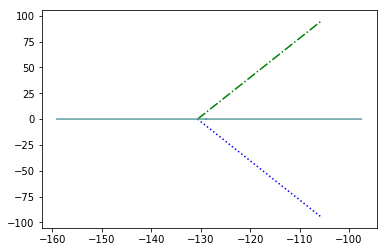

(-130.62583665338644, 0.0, 0.0) [66.08, 251, 0]
(-130.62583665338644, 0.0, 0.0) [ 0.25459191 -0.96704858  0.        ]


In [142]:
Ri = CreateRay()
Ray_TP = IntPolT2(Ri,coeffpolar,originpolar1,np.pi/4)
Ray_RP = IntPolR2(Ri,coeffpolar,originpolar1,np.pi/4)
xR,yR,zR = ML(Ray_RP[2],Ray_RP[3],100)
xT,yT,zT = ML(Ray_TP[2],Ray_TP[3],100)
pl.plot(xR,yR,color = 'blue', linestyle = ':') #reflected
pl.plot(xT,yT,color = 'green', linestyle = '-.') #transmitted
pl.plot(xp1,yp1,color = 'cadetblue')
pl.show()
#IT WORKS!??!??!?!? :O
print(Ray_TP[2],Ray_TP[3])
print(Ray_RP[2],Ray_RP[3])

In [143]:
#point (global)
sourcepoint = [-160.375,-113,0] #global
#angle (global)
rand = float(random.randrange(32000,96000))
angle = rand/1000
v = [angle,251,0] #random angle

#initial ray and first polarizer 
Ex,Ey,ThetP = InitialPolarization()
# polarization angle 1: np.pi/4
Ray_RP1,Ray_TP1,misints = IntP(sourcepoint,v,coeffpolar,originpolar1,Ex,Ey,ThetP,np.pi/4)

In [144]:
#Ray = [thet, I, vects]
xR,yR,zR = ML(Ray_RP1[2],Ray_RP1[3],100)
xT,yT,zT = ML(Ray_TP1[2],Ray_TP1[3],100)

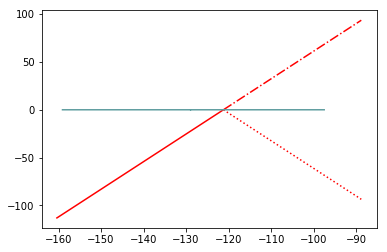

In [145]:
x,y,z = ML(sourcepoint,v,120)
pl.plot(x,y,color = 'red')
pl.plot(xR,yR,color = 'red', linestyle = ':')
pl.plot(xT,yT,color = 'red', linestyle = '-.')
pl.plot(xp1,yp1,color = 'cadetblue')
pl.show()
#ORIGINAL WAY

In [146]:
#now go on to next Ellipsoid 
#MAP OUT EACH OF THE 16 PATHS

sp10,v10 = RT(sourcepoint,v,thetG,originG,thet6,origin8) #ray from E10 (or GLobal Source rn)
points810,vects810 = REPCNi3(coeffellipse56,sp10,v10) #ray off of 8

'''Give ray and everything in global, does work in local, returns in global'''
def ReflEll(Ray,thetL,originL,coeffellipse):
    Ray_Refl = []
    originG = [0,0,0] # the global origin
    thetG = [0,0,0] # rotation with respect to itself aka 0,0,0
    sourcepoint = Ray[2] #originalpoint
    v = Ray[3] #vector
    SPLi,VPLi = RT(sourcepoint,v,thetG,originG,thetL,originL) #point and vector in local coordinates
    pointsf,vectsf = REPCNi3(coeffellipse,SPLi,VPLi)
    SPLf,VPLf = RT(pointsf,vectsf,thetL,originL,thetG,originG)
    Ray_Refl.append(Ray[0] + np.pi)
    Ray_Refl.append(Ray[1])
    Ray_Refl.append(SPLf)
    Ray_Refl.append(VPLf)
    Df = dist(SPLi,SPLf)
    Ray_Refl.append(Ray[4] + Df)
    return Ray_Refl

[5.806935868010303, 1.0, [-160.375, -113, 0], [94.871, 251, 0], 0]


/Users/Lab/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in sqrt


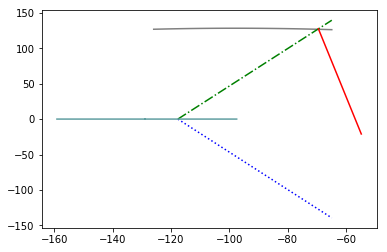

In [150]:
Ri = CreateRay() #original ray (SHOULD REMAIN UNCHANGED)
print(Ri) 
Ray_RP1 = IntPolR2(Ri,coeffpolar,originpolar1,np.pi/4)
Ray_TP1 = IntPolT2(Ri,coeffpolar,originpolar1,np.pi/4) #P1
Ray_E8 = ReflEll(Ray_TP1,thet6,origin8,coeffellipse56) #E8
Ray_TP2 = IntPolT2(Ray_E8,coeffpolar,originpolar2,np.pi/2) #P2



xR,yR,zR = ML(Ray_RP1[2],Ray_RP1[3],150)
xT,yT,zT = ML(Ray_TP1[2],Ray_TP1[3],150)
xE8,yE8,zE8 = ML(Ray_E8[2],Ray_E8[3],150)


pl.plot(xL8,yL8, color = 'grey')
pl.plot(xR,yR,color = 'blue', linestyle = ':') #reflected
pl.plot(xT,yT,color = 'green', linestyle = '-.') #transmitted
pl.plot(xp1,yp1,color = 'cadetblue')
pl.plot(xE8,yE8,color = 'red')
pl.show()
